# Домашнее задание по теме «Работа с переменными» обновленное

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from typing import Dict, T
from pandas import DataFrame, Series

In [89]:
data = fetch_california_housing(as_frame=True)

In [90]:
X = data.data
y = data.target

In [91]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [92]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Проверим данные на пропуски

In [93]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [94]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [95]:
y.hasnans

False

Функция вычисления метрик для линейной регрессии

In [96]:
def model_score(X:DataFrame, y:Series) -> Dict:
    '''
    Возвращает метрики RMSE и R2 для модели линейной регресии

    Параметры:
    ----------
    X : массив признаков
    y : истинное значение класса

    Возвращает:
    -----------
    {RMSE train,
     R2 train
     RMSE test
     R2 test}
    '''

    result = {}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_train)
    result['RMSE train'] = mean_squared_error(y_train, y_pred, squared=False)
    result['R2 train'] = model.score(X_train, y_train)
    y_pred = model.predict(X_test)
    result['RMSE test'] = mean_squared_error(y_test, y_pred, squared=False)
    result['R2 test'] = model.score(X_test, y_test)
    return result

In [97]:
model_score(X, y)

{'RMSE train': 0.7234924745376035,
 'R2 train': 0.6088968118672871,
 'RMSE test': 0.7273129773603114,
 'R2 test': 0.5943232652466202}

График распределения целевой переменной

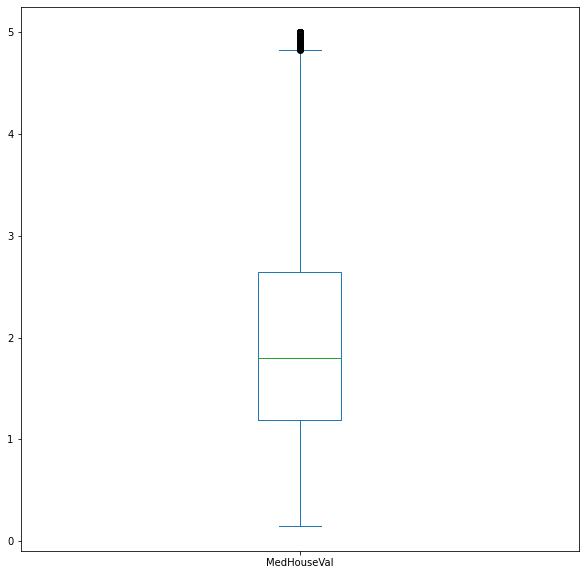

In [98]:
plt.rcParams['figure.figsize'] = 10,10
y.plot.box()

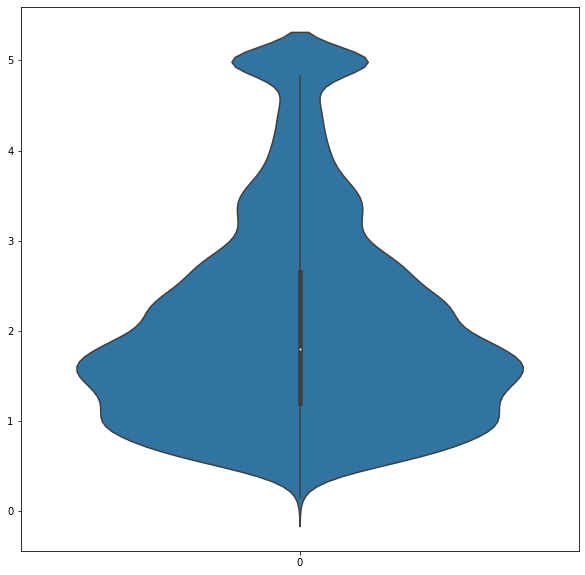

In [99]:
sns.violinplot(data=y)

Будем считать что выбросов нет

Построим матрицу корреляции признаков и целевой переменной

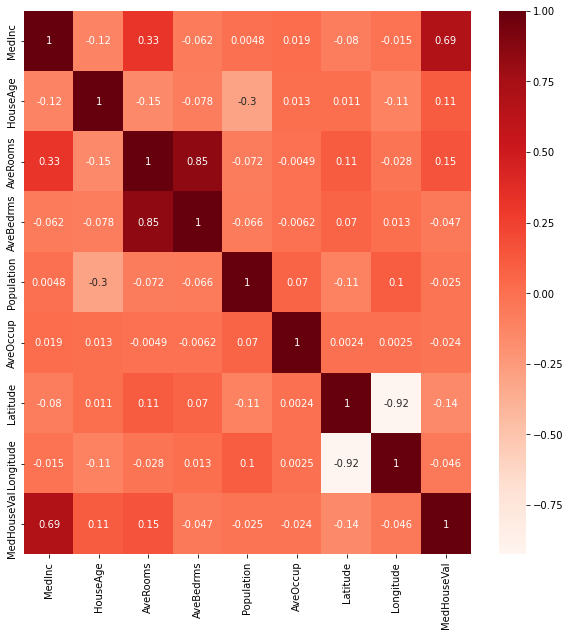

In [100]:
data = X.copy()
data['MedHouseVal'] = y
sns.heatmap(data.corr(), cmap="Reds", annot=True)

Видим очень слабую корреляцию целевой переменной от признаков `AveBedrms`, `Population`, `AveOccup`, `Longitude`. Попробуем их удалить и получить метрики модели

In [101]:
X_tmp = X.drop(['AveBedrms', 'Population', 'AveOccup', 'Longitude'], axis=1)
model_score(X_tmp, y)

{'RMSE train': 0.797715555733549,
 'R2 train': 0.5245340268610577,
 'RMSE test': 0.8107329651556174,
 'R2 test': 0.4959273977779416}

Видим некоторое ухудшение метрик качества

Изучим признаки на выбросы

Text(0.5, 1.0, 'Longitude')

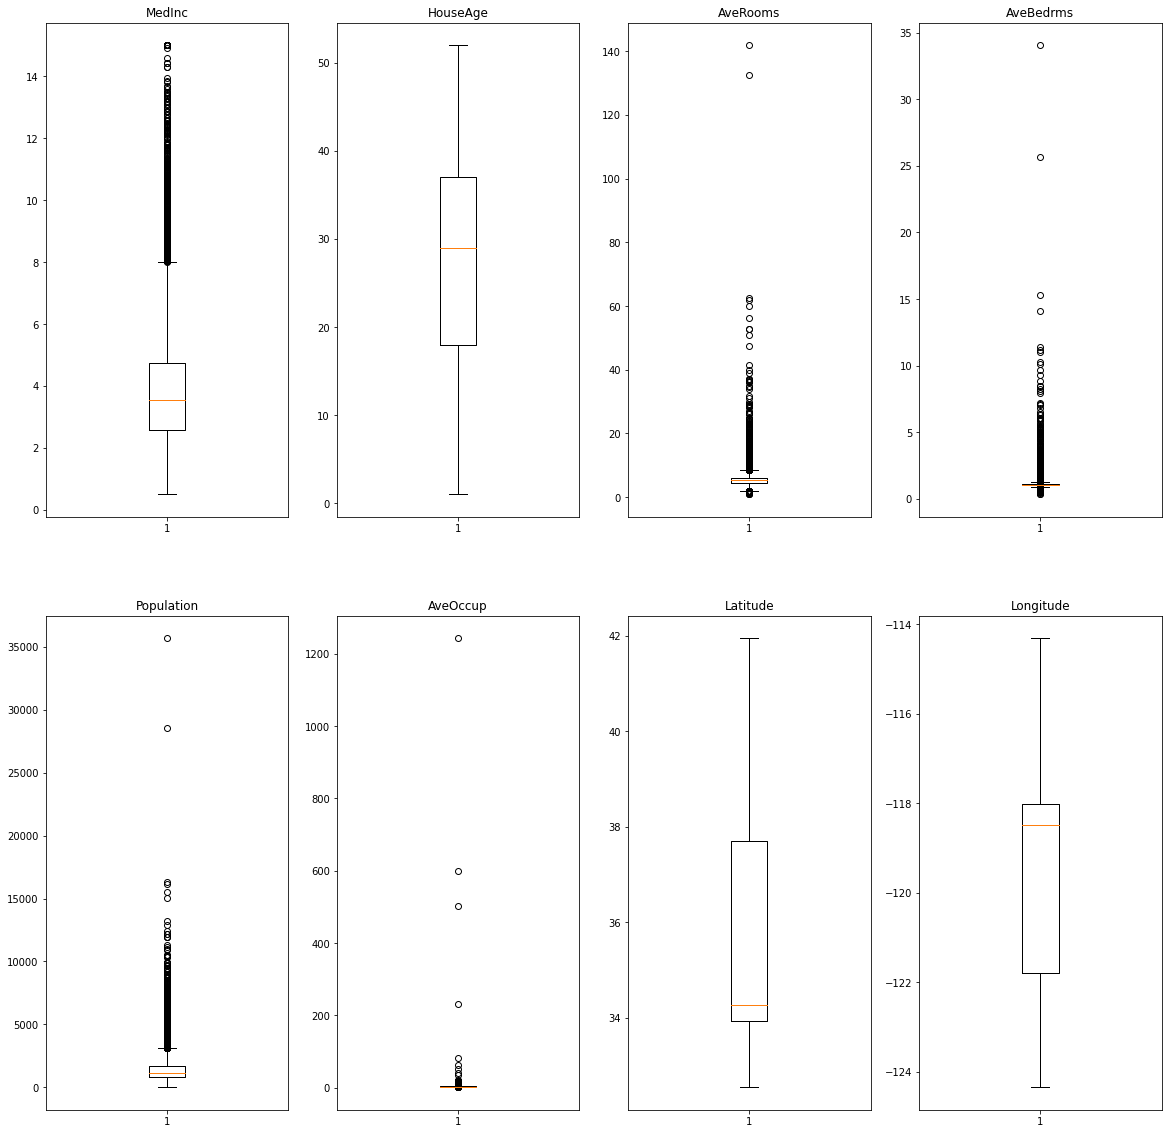

In [102]:
plt.rcParams['figure.figsize'] = 20,20

fig, axs = plt.subplots(2,4)
axs[0,0].boxplot(X['MedInc'])
axs[0,0].set_title('MedInc')
axs[0,1].boxplot(X['HouseAge'])
axs[0,1].set_title('HouseAge')
axs[0,2].boxplot(X['AveRooms'])
axs[0,2].set_title('AveRooms')
axs[0,3].boxplot(X['AveBedrms'])
axs[0,3].set_title('AveBedrms')
axs[1,0].boxplot(X['Population'])
axs[1,0].set_title('Population')
axs[1,1].boxplot(X['AveOccup'])
axs[1,1].set_title('AveOccup')
axs[1,2].boxplot(X['Latitude'])
axs[1,2].set_title('Latitude')
axs[1,3].boxplot(X['Longitude'])
axs[1,3].set_title('Longitude')

Во многих признаках есть явные выбросы (на что в т.ч. указано в описании датасета)

Попробуем их удалить и проверить качество модели:
- MedInc - оставляем как есть
- HouseAge - оставляем как есть
- AveRooms - удаляем > 45
- AveBedrms - удаляем > 7
- Population - удаляем > 15000
- AveOccup - удаляем > 200
- Latitude - оставляем как есть
- Longitude - оставляем как есть

In [103]:
data_tmp = data.drop(data[(data['AveRooms'] > 45)
                | (data['AveBedrms'] > 7)
                | (data['Population'] > 15000)
                | (data['AveOccup'] > 200)]
               .index)
y_tmp = data_tmp['MedHouseVal']
X_tmp = data_tmp.drop(['MedHouseVal'], axis=1)
model_score(X_tmp, y_tmp)

{'RMSE train': 0.7053275441933312,
 'R2 train': 0.6266978928403466,
 'RMSE test': 0.6963020498342755,
 'R2 test': 0.6347940752870427}

Видим некоторое улучшение метрик качества.

Посмотрим на графики измененных признаков и попробуем более жесткое отсечение выбросов

Text(0.5, 1.0, 'AveOccup')

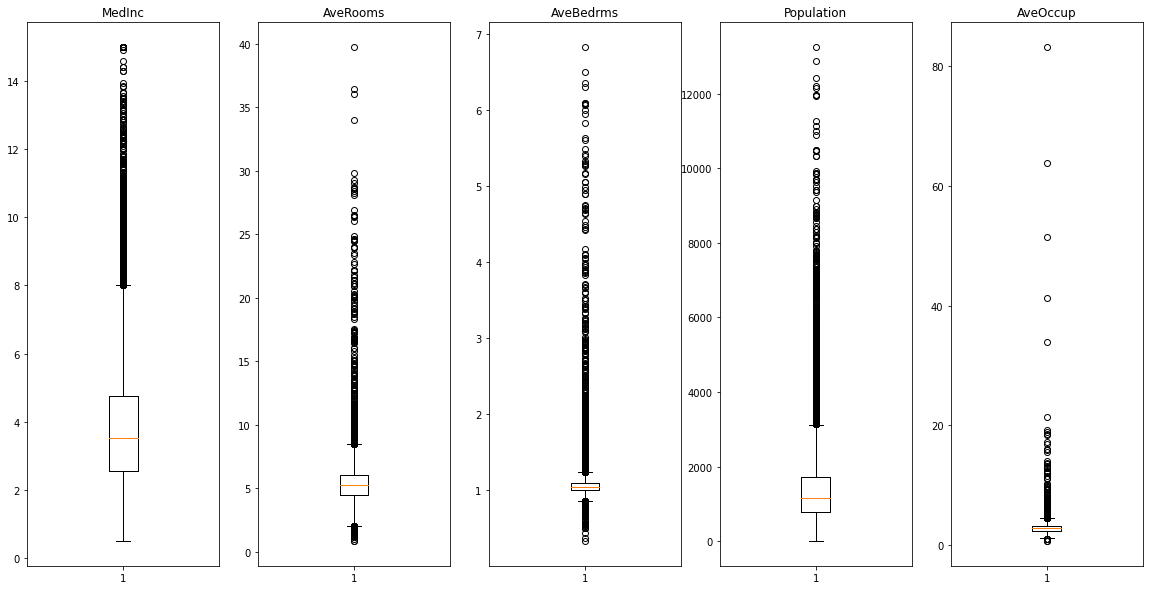

In [104]:
plt.rcParams['figure.figsize'] = 20,10

fig, axs = plt.subplots(1,5)
axs[0].boxplot(X_tmp['MedInc'])
axs[0].set_title('MedInc')
axs[1].boxplot(X_tmp['AveRooms'])
axs[1].set_title('AveRooms')
axs[2].boxplot(X_tmp['AveBedrms'])
axs[2].set_title('AveBedrms')
axs[3].boxplot(X_tmp['Population'])
axs[3].set_title('Population')
axs[4].boxplot(X_tmp['AveOccup'])
axs[4].set_title('AveOccup')

- MedInc - удаляем > 10
- AveRooms - удаляем > 10
- AveBedrms - удаляем > 2
- Population - удаляем > 1000
- AveOccup - удаляем > 20

In [105]:
data_tmp = data.drop(data[(data['MedInc'] > 10)
                | (data['AveRooms'] > 10)
                | (data['AveBedrms'] > 2)
                | (data['Population'] > 1000)
                | (data['AveOccup'] > 20)]
               .index)
y_tmp = data_tmp['MedHouseVal']
X_tmp = data_tmp.drop(['MedHouseVal'], axis=1)
model_score(X_tmp, y_tmp)

{'RMSE train': 0.752125959309376,
 'R2 train': 0.6184395205254399,
 'RMSE test': 0.7497807799759432,
 'R2 test': 0.5977711768402492}

Видим, что метрики ухудшились, поэтому возвращаемся к первоначальному варианту удаления выбросов

In [106]:
data_tmp = data.drop(data[(data['AveRooms'] > 45)
                | (data['AveBedrms'] > 7)
                | (data['Population'] > 15000)
                | (data['AveOccup'] > 200)]
               .index)
y = data_tmp['MedHouseVal']
X = data_tmp.drop(['MedHouseVal'], axis=1)

Рассмотрим кривые распределения признаков

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

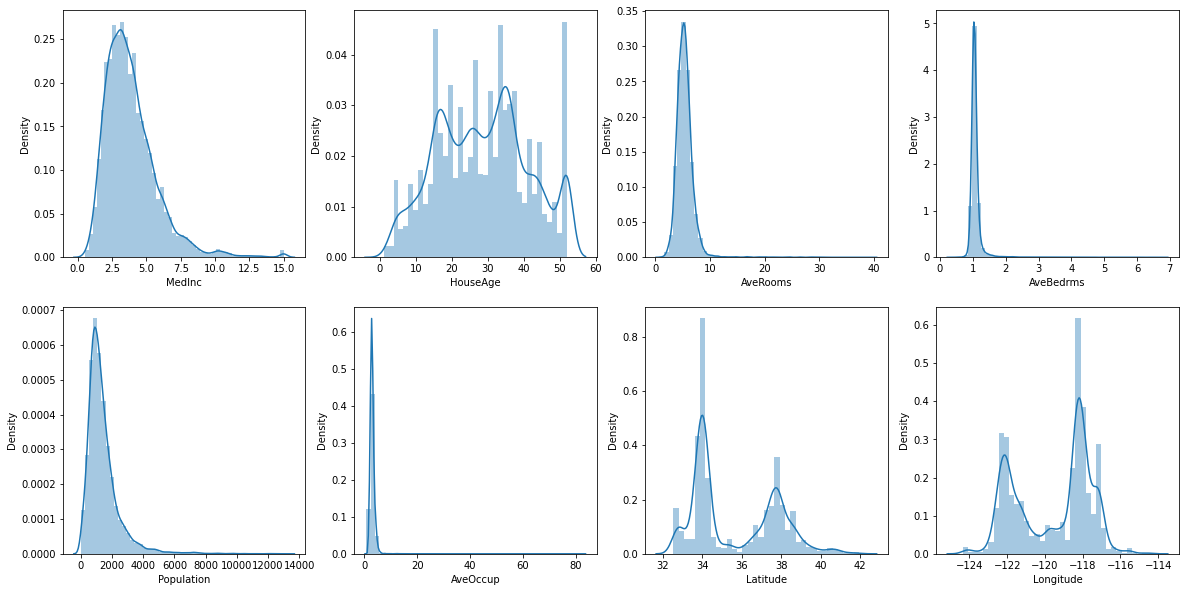

In [107]:
fig, axs = plt.subplots(2,4)
sns.distplot(X['MedInc'], ax=axs[0,0], axlabel='MedInc')
sns.distplot(X['HouseAge'], ax=axs[0,1], axlabel='HouseAge')
sns.distplot(X['AveRooms'], ax=axs[0,2], axlabel='AveRooms')
sns.distplot(X['AveBedrms'], ax=axs[0,3], axlabel='AveBedrms')
sns.distplot(X['Population'], ax=axs[1,0], axlabel='Population')
sns.distplot(X['AveOccup'], ax=axs[1,1], axlabel='AveOccup')
sns.distplot(X['Latitude'], ax=axs[1,2], axlabel='Latitude')
sns.distplot(X['Longitude'], ax=axs[1,3], axlabel='Longitude')

Для сильно смещенных влево распределений попробуем взять логарифм

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

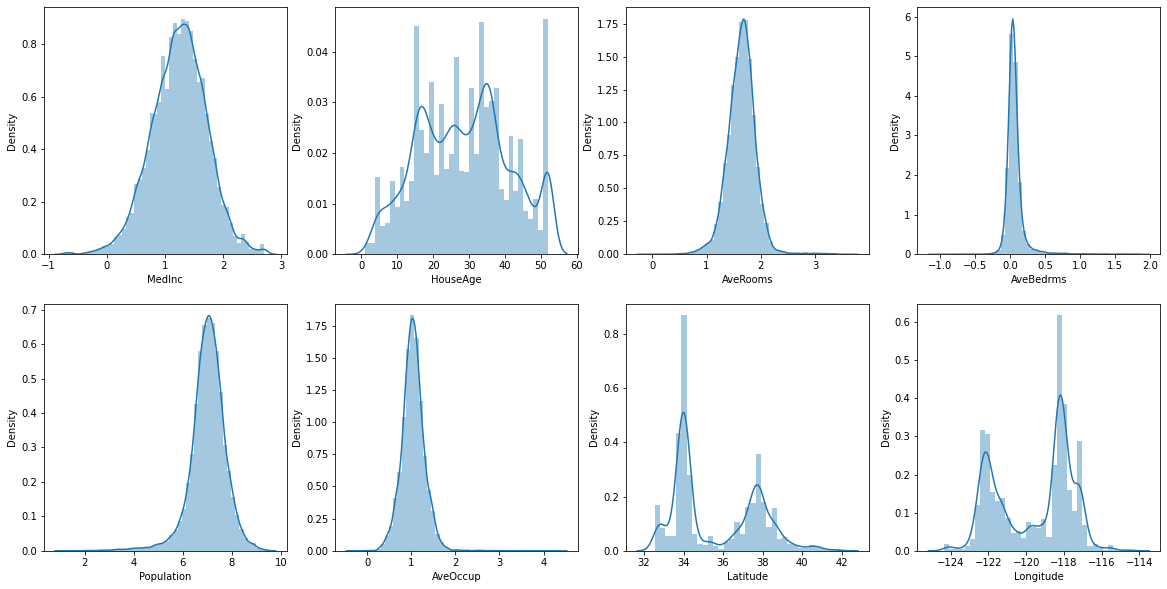

In [108]:
fig, axs = plt.subplots(2,4)
sns.distplot(np.log(X['MedInc']), ax=axs[0,0], axlabel='MedInc')
sns.distplot(X['HouseAge'], ax=axs[0,1], axlabel='HouseAge')
sns.distplot(np.log(X['AveRooms']), ax=axs[0,2], axlabel='AveRooms')
sns.distplot(np.log(X['AveBedrms']), ax=axs[0,3], axlabel='AveBedrms')
sns.distplot(np.log(X['Population']), ax=axs[1,0], axlabel='Population')
sns.distplot(np.log(X['AveOccup']), ax=axs[1,1], axlabel='AveOccup')
sns.distplot(X['Latitude'], ax=axs[1,2], axlabel='Latitude')
sns.distplot(X['Longitude'], ax=axs[1,3], axlabel='Longitude')

Добавим в данные дополнительные признаки и проверим метрики качества

In [109]:
X['MedInc_log'] = np.log(X['MedInc'])
X['AveRooms_log'] = np.log(X['AveRooms'])
X['AveBedrms_log'] = np.log(X['AveBedrms'])
X['Population_log'] = np.log(X['Population'])
X['AveOccup_log'] = np.log(X['AveOccup'])
model_score(X, y)

{'RMSE train': 0.6583231448733678,
 'R2 train': 0.6747951595239645,
 'RMSE test': 0.6558694954976954,
 'R2 test': 0.675975886036251}

## Выводы
Метрики качества

| Обработка                                                     | RMSE train         | RMSE test          | R2 train           | R2 test            |
|---------------------------------------------------------------|--------------------|--------------------|--------------------|--------------------|
| Все признаки                                                  | 0.7234924745376035 | 0.7273129773603114 | 0.6088968118672871 | 0.5943232652466202 |
| Удалены признаки с низкой корреляцией                         | 0.797715555733549  | 0.8107329651556174 | 0.5245340268610577 | 0.4959273977779416 |
| Удалены выбросы                                               | 0.7053275441933312 | 0.6963020498342755 | 0.6266978928403466 | 0.6347940752870427 |
| Удалены выбросы, добавлены новые признаки на основе логарифма | 0.6583231448733678 | 0.6558694954976954 | 0.6747951595239645 | 0.675975886036251  |

Лучший вариант дала обработка, включающая в себя удаление явных выбросов и добавление новых признаков на основе логарифма сильно смещенных по распределению признаков. Удаление признаков с низкой корреляцией напротив - ухудшило результат.